In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Countries and file paths
countries = ["benin", "sierraleone-bumbuna", "togo-dapaong_qc"]
files = {country: f"data/{country}_clean.csv" for country in countries}

In [4]:
# Load data and tag with country name
df_list = []
for country, path in files.items():
    df = pd.read_csv(path)
    df["Country"] = country.capitalize()
    df_list.append(df)



In [5]:
# Combine all countries into one DataFrame
all_data = pd.concat(df_list, ignore_index=True)



In [6]:
# Drop rows with missing values in GHI, DNI, DHI
metrics = ["GHI", "DNI", "DHI"]
all_data = all_data.dropna(subset=metrics)


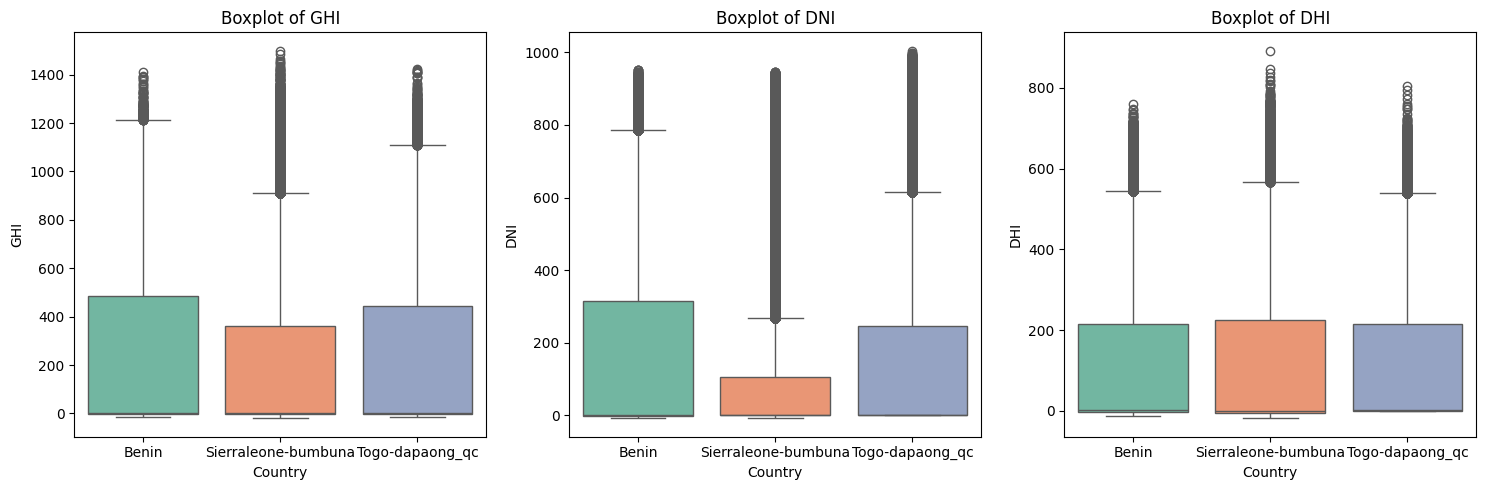

In [9]:
# 1. Boxplots for each metric
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x="Country", y=metric, hue="Country", data=all_data, palette="Set2", legend=False)
    plt.title(f"Boxplot of {metric}")
    plt.ylabel(metric)
    plt.xlabel("Country")
plt.tight_layout()
plt.show()


In [10]:

# 2. Summary Table: Mean, Median, Std Dev per Country
summary_stats = all_data.groupby("Country")[metrics].agg(["mean", "median", "std"])
print("\nSummary Statistics:")
print(summary_stats.round(2))



Summary Statistics:
                        GHI                    DNI                    DHI  \
                       mean median     std    mean median     std    mean   
Country                                                                     
Benin                240.56    1.8  331.13  167.19   -0.1  261.71  115.36   
Sierraleone-bumbuna  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   
Togo-dapaong_qc      230.56    2.1  322.53  151.26    0.0  250.96  116.44   

                                    
                    median     std  
Country                             
Benin                  1.6  158.69  
Sierraleone-bumbuna   -0.1  158.95  
Togo-dapaong_qc        2.5  156.52  
